In [1]:
from pathlib import Path
import pandas as pd

In [2]:
import sys
sys.path.append('../../src')
from DataLoader import DataLoader

In [3]:
fileLoader = DataLoader("../config.yaml")

In [4]:
fileLoader = DataLoader("../config.yaml")
df_opalmeta = fileLoader.load_data("files.df_opalmeta")
df_opalmeta.head(3)

/media/sz/Data/Connected_Lecturers/Opal_crosslab/raw/OPAL_files_attrib.p


,opal:filename,opal:oer_permalink,opal:license,opal:author,opal:title,opal:comment,opal:language,opal:publicationMonth,opal:publicationYear,opal:revisedAuthor,pipe:ID,pipe:file_type
0,SC_Hardware.png,https://bildungsportal.sachsen.de/opal/oer/6TI...,CC BY 4.0 Int.,Daniela Dobeleit,Hardware zum Styroporschneiden,,,,,[Vorname='Daniela' Familienname='Dobeleit' Tit...,6TIlFGfTxXkw,png
1,beleg.pdf,https://bildungsportal.sachsen.de/opal/oer/8I6...,CC BY-SA 4.0 Int.,,,,,,,,8I6sM5zapD60,pdf
2,Bereich III.pdf,https://bildungsportal.sachsen.de/opal/oer/8ZI...,CC BY-NC-ND 4.0 Int.,,,,,,,,8ZICOHBmAHyQ,pdf


In [5]:
keywords = ['FPAF_', 'AM_', 'DFAF_']
pattern = '|'.join(keywords)

# Finde alle zum Muster gehörden Dateien und erzeuge daraus einen neuen DataFrame unter angabe des Muster
zeidler_ids_opal = df_opalmeta[df_opalmeta["opal:filename"].str.contains(pattern, case=True)]['pipe:ID']
print(len(zeidler_ids_opal))

327


In [6]:
df_similarity = fileLoader.load_data("files.df_similarity")
df_similarity.head(3)

/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/similarity_all_metrics.p


,file1,file2,Pair,similarity_ai,similarity_cosine,similarity_jaccard,similarity_weighted_jaccard,similarity_tf_idf_cosine,similarity_overlap,similarity_dice,similarity_hierarchical,similarity_minhash_text
0,8I6sM5zapD60,8ZICOHBmAHyQ,"(8I6sM5zapD60, 8ZICOHBmAHyQ)",0.381628,0.031311,0.076923,0.040000,0.021814,0.166667,0.142857,0.171429,NaN
1,8I6sM5zapD60,8Lfz8SAKa6k0,"(8I6sM5zapD60, 8Lfz8SAKa6k0)",0.141063,0.473471,0.142857,0.142857,0.265912,0.250000,0.250000,0.143254,NaN
2,3ztCv-WpxJ4U,8I6sM5zapD60,"(3ztCv-WpxJ4U, 8I6sM5zapD60)",0.266481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,NaN


In [10]:
print(len(df_similarity))

20679756


In [7]:
# Füge allen Einträgen in df_similarity, bei denen die file1 und file2 in zeidler_ids_opal enthalten sind, den course "Zeidler" hinzu
zeidler_equal = df_similarity[df_similarity['file1'].isin(zeidler_ids_opal) & df_similarity['file2'].isin(zeidler_ids_opal)].copy()
zeidler_equal.head(3)

,file1,file2,Pair,similarity_ai,similarity_cosine,similarity_jaccard,similarity_weighted_jaccard,similarity_tf_idf_cosine,similarity_overlap,similarity_dice,similarity_hierarchical,similarity_minhash_text
1071312,1K6PY1moVSwQ,723L8Ft5Ms80,"(1K6PY1moVSwQ, 723L8Ft5Ms80)",0.969470,0.669589,0.384615,0.347826,0.578163,0.625000,0.555556,0.339076,0.074219
1071403,6tOeO_uR9h9E,723L8Ft5Ms80,"(6tOeO_uR9h9E, 723L8Ft5Ms80)",0.877530,0.535993,0.285714,0.258065,0.398007,0.500000,0.444444,0.412299,0.046875
1071661,723L8Ft5Ms80,7e8yT46h9xyY,"(723L8Ft5Ms80, 7e8yT46h9xyY)",0.952666,0.484726,0.307692,0.260870,0.356857,0.571429,0.470588,0.402451,0.078125


In [8]:
# Füge allen Einträgen in df_similarity, bei denen die file1 xor file2 in zeidler_ids_opal enthalten sind, den course "Zeidler" hinzu
zeidler_diff = df_similarity[df_similarity['file1'].isin(zeidler_ids_opal) ^ df_similarity['file2'].isin(zeidler_ids_opal)].copy()

# Wähle zufällig 3000 Einträge aus zeidler_diff
zeidler_diff = zeidler_diff.sample(n=3000, random_state=42)


=== HISTOGRAMME ALLER SIMILARITY-SPALTEN (ZEIDLER DATEN) ===
Verfügbare Similarity-Spalten: ['similarity_ai', 'similarity_cosine', 'similarity_jaccard', 'similarity_weighted_jaccard', 'similarity_tf_idf_cosine', 'similarity_overlap', 'similarity_dice', 'similarity_hierarchical', 'similarity_minhash_text']
Anzahl Metriken: 9
Shape des zeidler_equal DataFrames: (3003, 12)
Shape des zeidler_diff DataFrames: (3000, 12)
📊 Erstelle 3x3 Grid für 9 Metriken


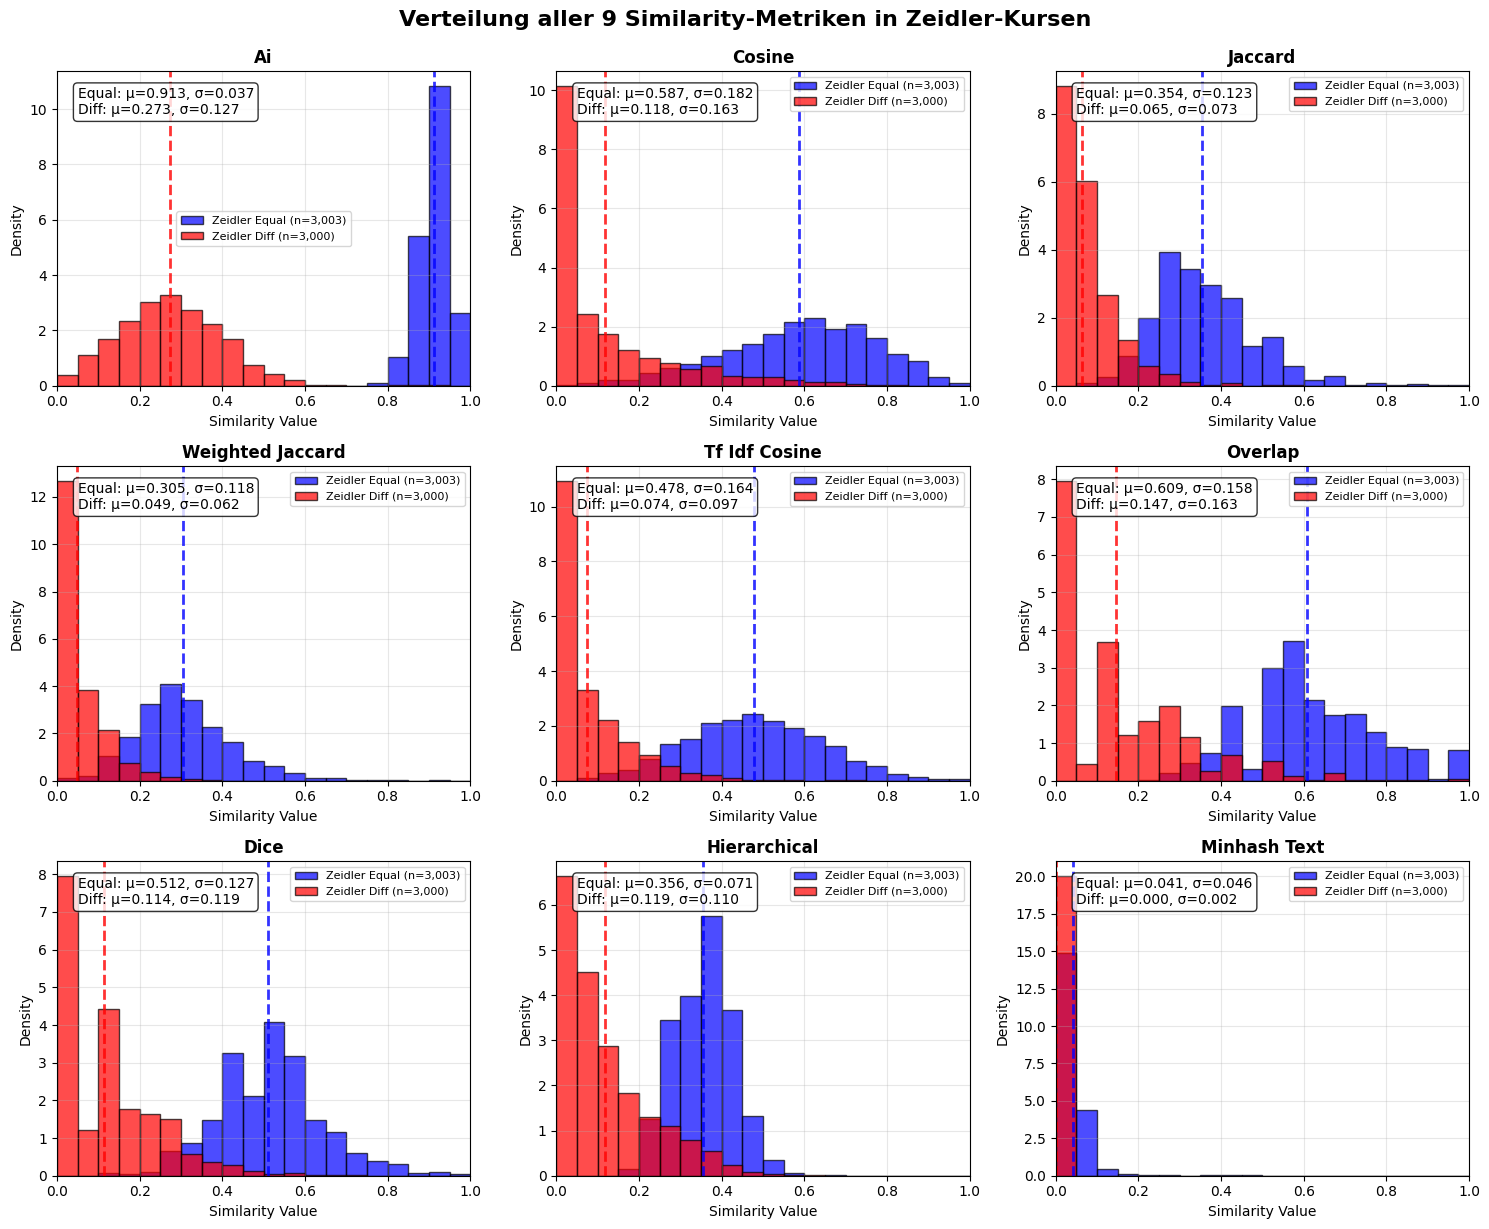

✅ Histogramm gespeichert als: similarity_histograms_zeidler_all_9_metrics.png

📊 STATISTIK-ZUSAMMENFASSUNG:
--------------------------------------------------------------------------------
Metrik                    Equal μ    Equal σ    Diff μ     Diff σ     Δμ        
--------------------------------------------------------------------------------
ai                        0.913      0.037      0.273      0.127      0.640     
cosine                    0.587      0.182      0.118      0.163      0.469     
jaccard                   0.354      0.123      0.065      0.073      0.289     
weighted_jaccard          0.305      0.118      0.049      0.062      0.256     
tf_idf_cosine             0.478      0.164      0.074      0.097      0.404     
overlap                   0.609      0.158      0.147      0.163      0.462     
dice                      0.512      0.127      0.114      0.119      0.398     
hierarchical              0.356      0.071      0.119      0.110      0.237     
m

In [10]:
# Erweiterte Histogramme für ALLE Similarity-Spalten aus df_similarity
import matplotlib.pyplot as plt
import numpy as np
import math

print("=== HISTOGRAMME ALLER SIMILARITY-SPALTEN (ZEIDLER DATEN) ===")

# Prüfe verfügbare Similarity-Spalten
similarity_cols = [col for col in zeidler_equal.columns if 'similarity' in col.lower()]
print(f"Verfügbare Similarity-Spalten: {similarity_cols}")
print(f"Anzahl Metriken: {len(similarity_cols)}")
print(f"Shape des zeidler_equal DataFrames: {zeidler_equal.shape}")
print(f"Shape des zeidler_diff DataFrames: {zeidler_diff.shape}")

if len(similarity_cols) == 0:
    print("❌ Keine Similarity-Spalten gefunden!")
else:
    # Berechne optimale Subplot-Anordnung
    n_metrics = len(similarity_cols)
    n_cols = min(3, n_metrics)  # Maximal 4 Spalten
    n_rows = math.ceil(n_metrics / n_cols)
    
    print(f"📊 Erstelle {n_rows}x{n_cols} Grid für {n_metrics} Metriken")
    
    # Erstelle dynamische Subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    
    # Stelle sicher, dass axes ein Array ist, auch bei nur einem Subplot
    if n_metrics == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    # Konsistente Farben für alle Diagramme
    color_equal = 'blue'      # Einheitliche Farbe für "Equal" (Intra-Kurs)
    color_diff = 'red'        # Einheitliche Farbe für "Diff" (Inter-Kurs)
    
    for i, col in enumerate(similarity_cols):
        if i < len(axes):
            # Entferne NaN-Werte für die Visualisierung
            values_equal = zeidler_equal[col].dropna()
            values_diff = zeidler_diff[col].dropna()
            
            # Erstelle Histogramm mit 20 Bins zwischen 0 und 1
            bins = np.linspace(0, 1, 21)  # 21 Kanten ergeben 20 Bins
            
            # Plotte beide Histogramme übereinander mit konsistenten Farben
            axes[i].hist(values_equal, bins=bins, alpha=0.7, color=color_equal, edgecolor='black', 
                        density=True, label=f'Zeidler Equal (n={len(values_equal):,})')
            axes[i].hist(values_diff, bins=bins, alpha=0.7, color=color_diff, edgecolor='black', 
                        density=True, label=f'Zeidler Diff (n={len(values_diff):,})')
            
            # Formatiere Titel (entferne "similarity_" prefix für bessere Lesbarkeit)
            title = col.replace('similarity_', '').replace('_', ' ').title()
            axes[i].set_title(f'{title}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Similarity Value')
            axes[i].set_ylabel('Density')
            axes[i].set_xlim(0, 1)  # Skaliere x-Achse von 0 bis 1
            axes[i].grid(True, alpha=0.3)
            
            # Berechne Statistiken
            if len(values_equal) > 0 and len(values_diff) > 0:
                mean_equal = values_equal.mean()
                std_equal = values_equal.std()
                mean_diff = values_diff.mean()
                std_diff = values_diff.std()
                
                # Füge Statistiken als Text hinzu
                stats_text = f'Equal: μ={mean_equal:.3f}, σ={std_equal:.3f}\nDiff: μ={mean_diff:.3f}, σ={std_diff:.3f}'
                axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes, 
                            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
                # Füge vertikale Linien für Mittelwerte hinzu
                axes[i].axvline(mean_equal, color=color_equal, linestyle='--', alpha=0.8, linewidth=2)
                axes[i].axvline(mean_diff, color=color_diff, linestyle='--', alpha=0.8, linewidth=2)
            
            axes[i].legend(fontsize=8)
    
    # Verstecke überschüssige Subplots
    for i in range(n_metrics, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle(f'Verteilung aller {n_metrics} Similarity-Metriken in Zeidler-Kursen', 
                 fontsize=16, y=1.02, fontweight='bold')
    
    # Speichere mit aussagekräftigem Namen
    filename = f'similarity_histograms_zeidler_all_{n_metrics}_metrics.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Histogramm gespeichert als: {filename}")
    
    # Zusätzliche Statistik-Zusammenfassung
    print(f"\n📊 STATISTIK-ZUSAMMENFASSUNG:")
    print("-" * 80)
    print(f"{'Metrik':<25} {'Equal μ':<10} {'Equal σ':<10} {'Diff μ':<10} {'Diff σ':<10} {'Δμ':<10}")
    print("-" * 80)
    
    for col in similarity_cols:
        values_equal = zeidler_equal[col].dropna()
        values_diff = zeidler_diff[col].dropna()
        
        if len(values_equal) > 0 and len(values_diff) > 0:
            mean_equal = values_equal.mean()
            std_equal = values_equal.std()
            mean_diff = values_diff.mean()
            std_diff = values_diff.std()
            delta_mean = mean_equal - mean_diff
            
            metric_name = col.replace('similarity_', '')[:24]  # Kürze lange Namen
            print(f"{metric_name:<25} {mean_equal:<10.3f} {std_equal:<10.3f} {mean_diff:<10.3f} {std_diff:<10.3f} {delta_mean:<10.3f}")
    
    print("-" * 80)
    print("Legende: Equal = Intra-Kurs Vergleiche, Diff = Inter-Kurs Vergleiche, Δμ = Differenz der Mittelwerte")